Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries, insurance is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance has requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, **they've asked you to use simple Logistic Regression, identifying the single feature that results in the best-performing model, as measured by accuracy**.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table (below) detailing the column names and descriptions below.

## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [73]:
# Import required libraries
library(tidyverse)
library(glue)
library(yardstick)

## 1. Reading in and explore the dataset

Creating a data frame and perform EDA to check data types, confirm if there are missing values, and examine distributions.

In [74]:
# load data
df <- read_csv("car_insurance.csv")
glimpse(df)

Rows: 10000 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): id, age, gender, race, driving_experience, education, income, cred...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10,000
Columns: 19
$ id                  <dbl> 569520, 750365, 199901, 478866, 731664, 877557, 93…
$ age                 <dbl> 3, 0, 0, 0, 1, 2, 3, 1, 2, 2, 3, 3, 2, 0, 1, 1, 3,…
$ gender              <dbl> 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,…
$ race                <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ driving_experience  <dbl> 0, 0, 0, 0, 1, 2, 3, 0, 2, 0, 3, 3, 2, 0, 1, 0, 3,…
$ education           <dbl> 2, 0, 2, 3, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3,…
$ income              <dbl> 3, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3,…
$ credit_score        <dbl> 0.6290273, 0.3577571, 0.4931458, 0.2060129, 0.3883…
$ vehicle_ownership   <dbl> 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,…
$ vehicle_year        <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,…
$ married             <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,…
$ children            <dbl> 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,…
$ postal_code  

In [75]:
# Remove id column
df <- df %>% select(-id)

In [76]:
# Convert data type, by lapply
#cols <- c("age", "gender", "race", "driving_experience", "education", "income", "vehicle_ownership", "vehicle_year", "married", "vehicle_type")
#df[cols]  <- lapply(df[cols], as.factor)

# Another way, by dplyr
# df %>% mutate(across(cols, as.factor))

#glimpse(df)

In [77]:
# summary to look describle statistics
summary(df)

      age           gender           race        driving_experience
 Min.   :0.00   Min.   :0.000   Min.   :0.0000   Min.   :0.000     
 1st Qu.:1.00   1st Qu.:0.000   1st Qu.:1.0000   1st Qu.:0.000     
 Median :1.00   Median :0.000   Median :1.0000   Median :1.000     
 Mean   :1.49   Mean   :0.499   Mean   :0.9012   Mean   :1.069     
 3rd Qu.:2.00   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:2.000     
 Max.   :3.00   Max.   :1.000   Max.   :1.0000   Max.   :3.000     
                                                                   
   education        income     credit_score    vehicle_ownership
 Min.   :0.00   Min.   :0.0   Min.   :0.0534   Min.   :0.000    
 1st Qu.:2.00   1st Qu.:1.0   1st Qu.:0.4172   1st Qu.:0.000    
 Median :2.00   Median :2.0   Median :0.5250   Median :1.000    
 Mean   :2.01   Mean   :1.9   Mean   :0.5158   Mean   :0.697    
 3rd Qu.:3.00   3rd Qu.:3.0   3rd Qu.:0.6183   3rd Qu.:1.000    
 Max.   :3.00   Max.   :3.0   Max.   :0.9608   Max.   :1.000    
 

## 2. Imputing missing values

Two variables - `credit_score` and `annual_mileage` have missing values.

First use histogram to check if they're normal distributed.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 982 rows containing non-finite values (`stat_bin()`).”


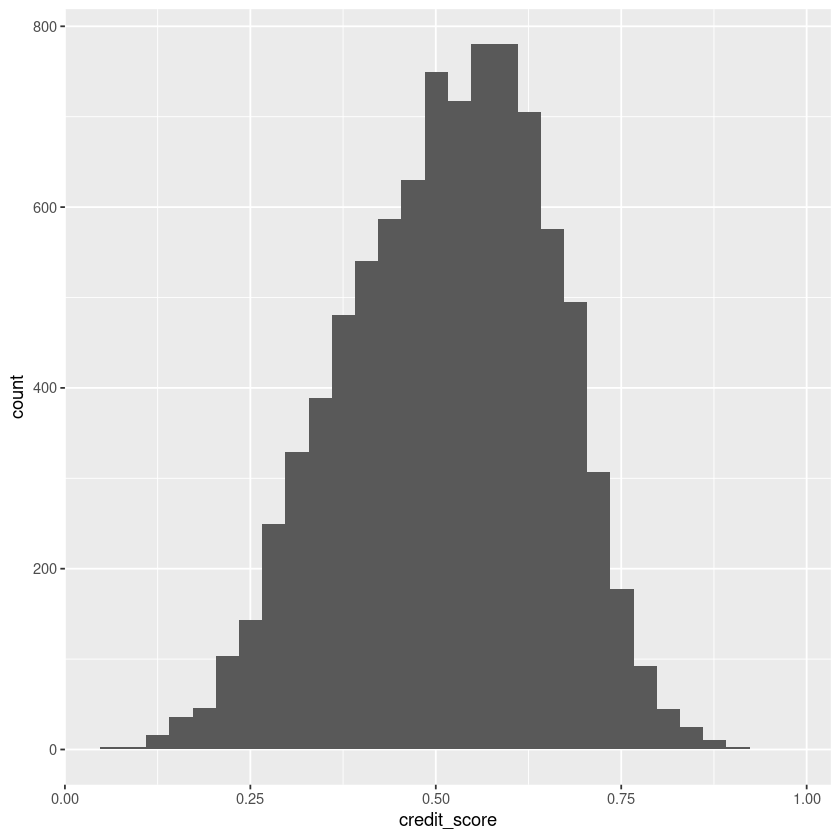

In [78]:
# Visualize credit_score distribution
ggplot(df, aes(credit_score)) +
	geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 957 rows containing non-finite values (`stat_bin()`).”


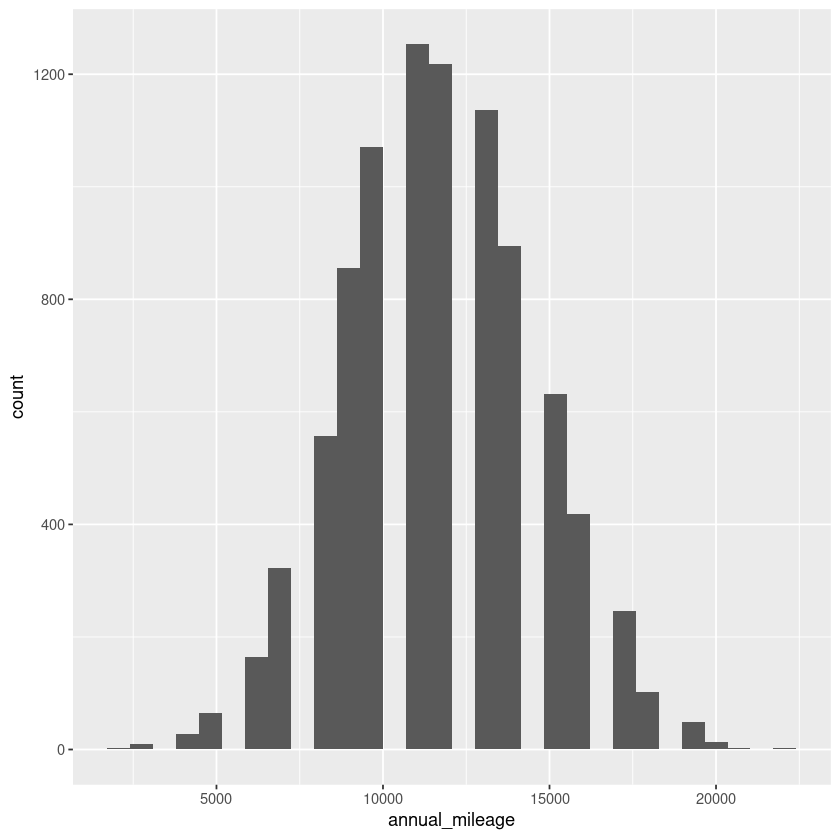

In [79]:
# Visualize annual_mileage distribution
ggplot(df, aes(annual_mileage)) +
	geom_histogram()

Since two variable look like have normal distribution, we can impute missing value with the mean.

In [80]:
# Impute credit_score and annual_mileage missing values with mean
df_impute <- df %>% 
	mutate(credit_score = ifelse(is.na(credit_score), mean(credit_score, na.rm = T), credit_score),
		   annual_mileage = ifelse(is.na(annual_mileage), mean(annual_mileage, na.rm = T), annual_mileage))

summary(df_impute)

      age           gender           race        driving_experience
 Min.   :0.00   Min.   :0.000   Min.   :0.0000   Min.   :0.000     
 1st Qu.:1.00   1st Qu.:0.000   1st Qu.:1.0000   1st Qu.:0.000     
 Median :1.00   Median :0.000   Median :1.0000   Median :1.000     
 Mean   :1.49   Mean   :0.499   Mean   :0.9012   Mean   :1.069     
 3rd Qu.:2.00   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:2.000     
 Max.   :3.00   Max.   :1.000   Max.   :1.0000   Max.   :3.000     
   education        income     credit_score     vehicle_ownership
 Min.   :0.00   Min.   :0.0   Min.   :0.05336   Min.   :0.000    
 1st Qu.:2.00   1st Qu.:1.0   1st Qu.:0.43151   1st Qu.:0.000    
 Median :2.00   Median :2.0   Median :0.51581   Median :1.000    
 Mean   :2.01   Mean   :1.9   Mean   :0.51581   Mean   :0.697    
 3rd Qu.:3.00   3rd Qu.:3.0   3rd Qu.:0.60761   3rd Qu.:1.000    
 Max.   :3.00   Max.   :3.0   Max.   :0.96082   Max.   :1.000    
  vehicle_year       married          children       postal_co

## 3. Preparing to build Logistic Regression models

In [81]:
# Features data frame
x <- df_impute %>% select(-outcome)
features_df <- data.frame(feature = names(x))
features_df

feature
<chr>
age
gender
race
driving_experience
education
income
credit_score
vehicle_ownership
vehicle_year


## 4. Building the models and Measuring performance

In [82]:
# Build one logistic model per feature
#Lmods <- apply(df_impute[,-18], 2, function(x) glm(outcome ~ x, data = df_impute, family = "binomial"))
#Lmods

In [87]:
# Empty vector to store each model accuracy
model_accuracy <- c()

# Loop each features
for (col in features_df$feature) {
	# Generate each model formula
	formula <- as.formula(paste("outcome", "~", col))
	# Fit each model
	model <- glm(formula, df_impute, family = "binomial")
	# Predict each model
	prediction <- round(fitted(model))
	# Caculate each model accuracy
	accuracy <- mean(df_impute$outcome == prediction)
	# Add accuracy to vector
	model_accuracy <- append(model_accuracy, accuracy)
}

# Bind accuracy to features_df
accuracy_df <- cbind(features_df, model_accuracy) %>%
	arrange(desc(model_accuracy))

accuracy_df

feature,model_accuracy
<chr>,<dbl>
driving_experience,0.7771
age,0.7747
income,0.7425
vehicle_ownership,0.7351
credit_score,0.7054
annual_mileage,0.6904
gender,0.6867
race,0.6867
education,0.6867


## 6. Finding the best performing model

In [84]:
# ans
best_feature_df <- data.frame(
	best_feature = accuracy_df$feature[which.max(accuracy_df$model_accuracy)], 
	best_accuracy = max(accuracy_df$model_accuracy))
	
best_feature_df

best_feature,best_accuracy
<chr>,<dbl>
driving_experience,0.7771
